## Fit the model/algorithm on our data and use it to make predictions


In [155]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [156]:
heart_disease = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv")


# Setup random seed
np.random.seed(42) # only , you can see same result

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

In [157]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)

# Evaluate the Random Forest Classifier
model.score(x_test, y_test)

0.8524590163934426

In [158]:
# predict from the model
"""
1. predict()
2. predict_proba()
"""
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [159]:
# compare prediction and real values
np.array(y_test)


array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [160]:
# model accuracy 1
model.score(x_test, y_test)

0.8524590163934426

In [161]:
# model accuracy 2
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8524590163934426

In [162]:
# predict_proba() for model
model.predict_proba(x_test[:10])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [163]:
model.predict(x_test[:10])

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1])

## Cross validating the model

In [164]:
# cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(model,x, y,cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])


## Classification model evaluation metrics
1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

In [165]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [166]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, x, y, cv=5)
cross_val_score, np.mean(cross_val_score)

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 0.8248087431693989)

Area under the receiver operating characteristic curve (AUC/ROC)

1. Area under curve (AUC)
2. ROC curve
3. ROC curves are a comparison of a model's true postive rate (tpr) versus a models false positive rate (fpr).


---
1. True positive = model predicts 1 when truth is 1
2. False positive = model predicts 1 when truth is 0
3. True negative = model predicts 0 when truth is 0
4. False negative = model predicts 0 when truth is 1

In [167]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [168]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [169]:
y_probs

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ],
       [0.13, 0.87],
       [0.29, 0.71],
       [0.04, 0.96],
       [0.53, 0.47],
       [0.15, 0.85],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.14, 0.86],
       [0.01, 0.99],
       [0.19, 0.81],
       [0.95, 0.05],
       [0.64, 0.36],
       [0.15, 0.85],
       [0.84, 0.16],
       [0.29, 0.71],
       [0.51, 0.49],
       [0.8 , 0.2 ],
       [0.85, 0.15],
       [0.76, 0.24],
       [0.4 , 0.6 ],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.15, 0.85],
       [0.23, 0.77],
       [0.81, 0.19],
       [0.  , 1.  ],
       [0.6 , 0.4 ],
       [0.24, 0.76],
       [0.11, 0.89],
       [0.67, 0.33],
       [1.  , 0.  ],
       [0.51, 0.49],
       [0.96, 0.04],
       [0.08,

In [170]:
# Calculate fpr, tpr and thresholds
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr, tpr

(array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
        0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
        0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
        0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
        0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
        1.        ]),
 array([0.     , 0.     , 0.125  , 0.1875 , 0.25   , 0.3125 , 0.375  ,
        0.375  , 0.5    , 0.53125, 0.5625 , 0.59375, 0.59375, 0.625  ,
        0.71875, 0.71875, 0.78125, 0.8125 , 0.90625, 0.90625, 0.9375 ,
        0.9375 , 0.96875, 0.96875, 1.     , 1.     ]))

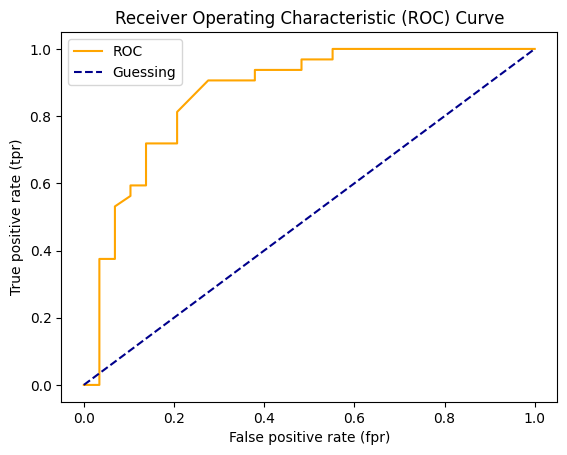

In [171]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    
    # Customize the plot
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()

plot_roc_curve(fpr, tpr)

In [172]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

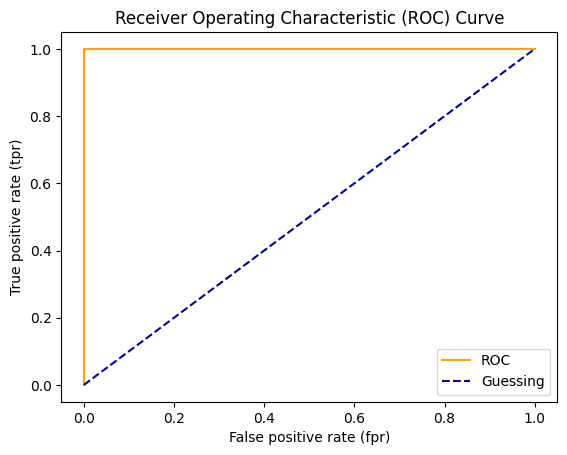

In [173]:
# Plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

When you first encounter them, ROC Curve and AUC (area under curve) metrics can be a little confusing. But not to worry, with a little practice, they'll start to make sense.

In a nutshell, what you should remember is:

- ROC curves and AUC metrics are evaluation metrics for binary classification models (a model which predicts one thing or another, such as heart disease or not).

- The ROC curve compares the true positive rate (tpr) versus the false positive rate (fpr) at different classification thresholds.

- The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

## Confusion matrix
The next way to evaluate a classification model is by using a confusion matrix.

- A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [174]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [175]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,23,6
1,6,26


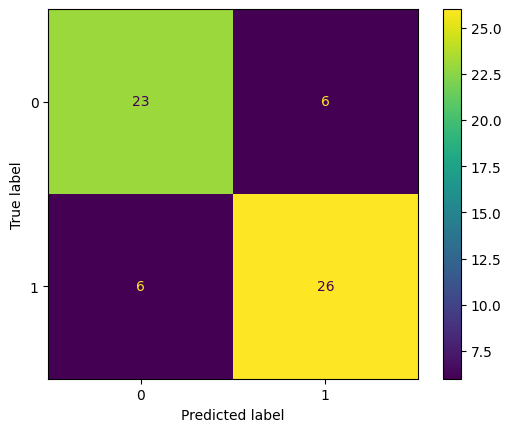

In [176]:
from sklearn.metrics import ConfusionMatrixDisplay

# Plot confusion matrix from predictions
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds)

## Classification Model : Evaluation metrics

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [178]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True,
                                   zero_division=0))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics:

- Accuracy : is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).
- Precision and recall become more important when classes are imbalanced.
- If false positive predictions are worse than false negatives, aim for higher precision.
- If false negative predictions are worse than false positives, aim for higher recall.
- F1-score is a combination of precision and recall.

## Regression Model : Evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we're going to cover are:

1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

- R^2
What R-squared does: Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

In [199]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing["data"], columns=housing["feature_names"])
housing_df["MedHouseVal"] = housing["target"]
housing_df["target"] = housing["target"]
housing_df.drop("MedHouseVal", axis=1)
housing_df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3.422


In [201]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate Random Forest Classifier
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)


RandomForestRegressor()

In [202]:
model.score(x_test, y_test)

0.999999302094669

In [203]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031])

In [204]:
r2_score(y_true=y_test,
         y_pred=y_test_mean)

0.0

In [205]:
r2_score(y_true=y_test,
         y_pred=y_test)

1.0

## Mean absolute error (MAE)

- MAE is the average of the absolute differences between predictions and actual values.

- It gives you an idea of how wrong your models predictions are.

In [211]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae # very less error


0.00019074459786971705

In [212]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
df["differences"] = df["predicted values"] - df["actual values"]
df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.47714,1.400000e-04
3024,0.45800,0.45555,-2.450000e-03
15663,5.00001,5.00001,3.019807e-14
20484,2.18600,2.18608,8.000000e-05
9814,2.78000,2.78006,6.000000e-05
13311,1.58700,1.58688,-1.200000e-04
7113,1.98200,1.98184,-1.600000e-04
7668,1.57500,1.57500,-4.440892e-16
18246,3.40000,3.39997,-3.000000e-05
5723,4.46600,4.46650,5.000000e-04


In [213]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

0.00019074459786971705

## Mean squared error (MSE)

- MSE is the mean of the square of the errors between actual and predicted values.

In [214]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.145414116255094e-07

In [215]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.47714,1.400000e-04,1.960000e-08
3024,0.45800,0.45555,-2.450000e-03,6.002500e-06
15663,5.00001,5.00001,3.019807e-14,9.119232e-28
20484,2.18600,2.18608,8.000000e-05,6.400000e-09
9814,2.78000,2.78006,6.000000e-05,3.600000e-09


## Using different evaluation metrics as Scikit-Learn functions
Way to evaluate scikit-learn machine learning models/estimators is to using the sklearn.metrics module - https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [216]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accurracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615
